# Preprocessing

Dataset upload

In [1]:
import pandas as pd
import math
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
#df.head()
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
df.shape

(3390, 17)

In [6]:
df.info

<bound method DataFrame.info of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0             1         0    212.0  168.0   98.0  29.77   
2                   0             0         0    250.0  116.0   71.0  20.35   
3                   0             1         0    233.0  158.0   88.0  28.26   
4                   0             0         0    241.0  136.5   85.0  26.42   
...               ...           ...       ...      ...    ...    ...    ...   
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
0          90.0     80.0           1  
1          72.0     75.0           0  
2          88.0     94.0           0  
3          68.0     94.0           1  
4          70.0     77.0           0  
...         ...      ...         ...  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0  

[3390 rows x 17 columns]>

Check missing values

In [7]:
missing_data = df.isna().sum()
print(missing_data)

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [9]:
import math
import pandas as pd

# Example DataFrame (assuming `df` is already loaded with your data)
# columns_with_missing_data is a list of columns you want to process for missing values
columns_with_missing_data = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Loop through each column with missing data and calculate the mean values
for column in columns_with_missing_data:
    # Calculate the mean value of the feature
    mean_value = df[column].mean()
    print(f"{column} - Mean Value (All):", round(mean_value, 1), math.ceil(mean_value))

    # Calculate the mean value of the specified feature, excluding 0.0
    mean_value_exclude_zero = df[df[column] != 0.0][column].mean()
    print(f"{column} - Mean Value (Excluding 0):", round(mean_value_exclude_zero, 1), math.ceil(mean_value_exclude_zero))

    # Calculate the mean value of the specified feature, excluding 0.0 and NaN
    mean_value_exclude_zero_nan = df[(df[column] != 0.0) & (~df[column].isna())][column].mean()
    print(f"{column} - Mean Value (Excluding 0 & NaN):", round(mean_value_exclude_zero_nan, 1), math.ceil(mean_value_exclude_zero_nan))

    # Fill missing values with the mean calculated excluding 0 and NaN
    df[column] = df[column].fillna(mean_value_exclude_zero_nan)

# Display updated missing values
missing_data_after = df.isna().sum()
print("\nMissing data after filling:")
print(missing_data_after)


education - Mean Value (All): 2.0 2
education - Mean Value (Excluding 0): 2.0 2
education - Mean Value (Excluding 0 & NaN): 2.0 2
cigsPerDay - Mean Value (All): 9.1 10
cigsPerDay - Mean Value (Excluding 0): 18.3 19
cigsPerDay - Mean Value (Excluding 0 & NaN): 18.3 19
BPMeds - Mean Value (All): 0.0 1
BPMeds - Mean Value (Excluding 0): 1.0 1
BPMeds - Mean Value (Excluding 0 & NaN): 1.0 1
totChol - Mean Value (All): 237.1 238
totChol - Mean Value (Excluding 0): 237.1 238
totChol - Mean Value (Excluding 0 & NaN): 237.1 238
BMI - Mean Value (All): 25.8 26
BMI - Mean Value (Excluding 0): 25.8 26
BMI - Mean Value (Excluding 0 & NaN): 25.8 26
heartRate - Mean Value (All): 76.0 76
heartRate - Mean Value (Excluding 0): 76.0 76
heartRate - Mean Value (Excluding 0 & NaN): 76.0 76
glucose - Mean Value (All): 82.1 83
glucose - Mean Value (Excluding 0): 82.1 83
glucose - Mean Value (Excluding 0 & NaN): 82.1 83

Missing data after filling:
id                 0
age                0
education          0

In [14]:
import math
import pandas as pd

# List of columns with missing or 0.0 values to process
columns_with_missing_data = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Loop through each column with missing or 0.0 values
mean_values = {}

for column in columns_with_missing_data:
    # Calculate the mean value of the specified feature, excluding 0.0 and NaN
    mean_value_exclude_zero_nan = df[(df[column] != 0.0) & (~df[column].isna())][column].mean()
    mean_values[column] = mean_value_exclude_zero_nan

    # Print the mean and its ceiling for verification
    print(f"{column} - Mean Value (Excluding 0 & NaN):", round(mean_value_exclude_zero_nan, 1), math.ceil(mean_value_exclude_zero_nan))


education - Mean Value (Excluding 0 & NaN): 2.0 2
cigsPerDay - Mean Value (Excluding 0 & NaN): 18.3 19
BPMeds - Mean Value (Excluding 0 & NaN): 1.0 1
totChol - Mean Value (Excluding 0 & NaN): 237.1 238
BMI - Mean Value (Excluding 0 & NaN): 25.8 26
heartRate - Mean Value (Excluding 0 & NaN): 76.0 76
glucose - Mean Value (Excluding 0 & NaN): 82.1 83


In [15]:
# Replace 0.0 values with the ceiling of the calculated mean
for column in columns_with_missing_data:
    # Use the calculated mean value from the previous cell
    mean_value_exclude_zero_nan = mean_values[column]

    # Replace 0.0 values with the ceiling of the calculated mean
    df.loc[df[column] == 0.0, column] = math.ceil(mean_value_exclude_zero_nan)

    # Print the update for verification
    print(f"Replaced 0.0 in {column} with {math.ceil(mean_value_exclude_zero_nan)}")


Replaced 0.0 in education with 2
Replaced 0.0 in cigsPerDay with 19
Replaced 0.0 in BPMeds with 1
Replaced 0.0 in totChol with 238
Replaced 0.0 in BMI with 26
Replaced 0.0 in heartRate with 76
Replaced 0.0 in glucose with 83


In [16]:
# Display updated missing values
missing_data_after = df.isna().sum()
print("\nMissing data after filling:")
print(missing_data_after)



Missing data after filling:
id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [17]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,1.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.00000,1
1,1,36,4.0,M,NO,19.0,1.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.00000,0
2,2,46,1.0,F,YES,10.0,1.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.00000,0
3,3,50,1.0,M,YES,20.0,1.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.00000,1
4,4,64,1.0,F,YES,30.0,1.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.00000,0
5,5,61,3.0,F,NO,19.0,1.0,0,1,0,272.0,182.0,121.0,32.800000,85.0,65.00000,1
6,6,61,1.0,M,NO,19.0,1.0,0,1,0,238.0,232.0,136.0,24.830000,75.0,79.00000,0
7,7,36,4.0,M,YES,35.0,1.0,0,0,0,295.0,102.0,68.0,28.150000,60.0,63.00000,0
8,8,41,2.0,F,YES,20.0,1.0,0,0,0,220.0,126.0,78.0,20.700000,86.0,79.00000,0
9,9,55,2.0,F,NO,19.0,1.0,0,1,0,326.0,144.0,81.0,25.710000,85.0,82.08652,0


In [18]:
# Calculate and display the minimum and maximum values for each feature (column)
min_max_values = df.aggregate(['min', 'max'])
print("Minimum and Maximum Values for Each Feature:")
print(min_max_values)

Minimum and Maximum Values for Each Feature:
       id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
min     0   32        1.0   F         NO         1.0     1.0                0   
max  3389   70        4.0   M        YES        70.0     1.0                1   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
min             0         0    107.0   83.5   48.0  15.96       45.0     40.0   
max             1         1    696.0  295.0  142.5  56.80      143.0    394.0   

     TenYearCHD  
min           0  
max           1  


In [20]:
# Loop through each column to remove ".0" from the values
for column in columns_with_missing_data:
    # Remove ".0" from the column values
    df[column] = df[column].astype(str).str.rstrip('.0')

    # Print the updated column for verification (showing first 10 rows)
    print(f"Updated values in {column}:")
    print(df[column].head(10))


Updated values in education:
0    2
1    4
2    1
3    1
4    1
5    3
6    1
7    4
8    2
9    2
Name: education, dtype: object
Updated values in cigsPerDay:
0     3
1    19
2     1
3     2
4     3
5    19
6    19
7    35
8     2
9    19
Name: cigsPerDay, dtype: object
Updated values in BPMeds:
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: BPMeds, dtype: object
Updated values in totChol:
0    221
1    212
2     25
3    233
4    241
5    272
6    238
7    295
8     22
9    326
Name: totChol, dtype: object
Updated values in BMI:
0    25.794964454976306
1                 29.77
2                 20.35
3                 28.26
4                 26.42
5                  32.8
6                 24.83
7                 28.15
8                  20.7
9                 25.71
Name: BMI, dtype: object
Updated values in heartRate:
0     9
1    72
2    88
3    68
4     7
5    85
6    75
7     6
8    86
9    85
Name: heartRate, dtype: object
Updated values in glucose:
0  

In [21]:
# Loop through each column to replace all values with 1, except for 0
for column in columns_with_missing_data:
    # Replace all values except for 0 with 1
    df.loc[df[column] != '0', column] = 1

    # Print the updated column for verification (showing first 10 rows)
    print(f"Updated values in {column} (Replaced non-zero values with 1):")
    print(df[column].head(10))


Updated values in education (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: education, dtype: object
Updated values in cigsPerDay (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: cigsPerDay, dtype: object
Updated values in BPMeds (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: BPMeds, dtype: object
Updated values in totChol (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: totChol, dtype: object
Updated values in BMI (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: BMI, dtype: object
Updated values in heartRate (Replaced non-zero values with 1):
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: heartRate, dtype: object
Updated values in glucose (Replaced 

In [22]:
# Save the updated DataFrame back to a CSV file
df.to_csv('Cardiovascular_Preprocessed.csv',index=False)

In [26]:
from google.colab import files


In [27]:
# Download the file to your local PC
files.download('Cardiovascular_Preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Unsupervised

In [33]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
from google.colab import files
uploaded = files.upload()

Saving Cardiovascular_Preprocessed.csv to Cardiovascular_Preprocessed (1).csv


In [30]:
df = pd.read_csv('/content/Cardiovascular_Preprocessed (1).csv')

In [31]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,1,F,YES,1,1,0,0,0,1,148.0,85.0,1,1,1,1
1,1,36,1,M,NO,1,1,0,1,0,1,168.0,98.0,1,1,1,0
2,2,46,1,F,YES,1,1,0,0,0,1,116.0,71.0,1,1,1,0
3,3,50,1,M,YES,1,1,0,1,0,1,158.0,88.0,1,1,1,1
4,4,64,1,F,YES,1,1,0,0,0,1,136.5,85.0,1,1,1,0


In [34]:
# Selecting features for unsupervised learning (excluding the target column 'TenYearCHD' and other non-numeric features)
features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['TenYearCHD', 'id'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


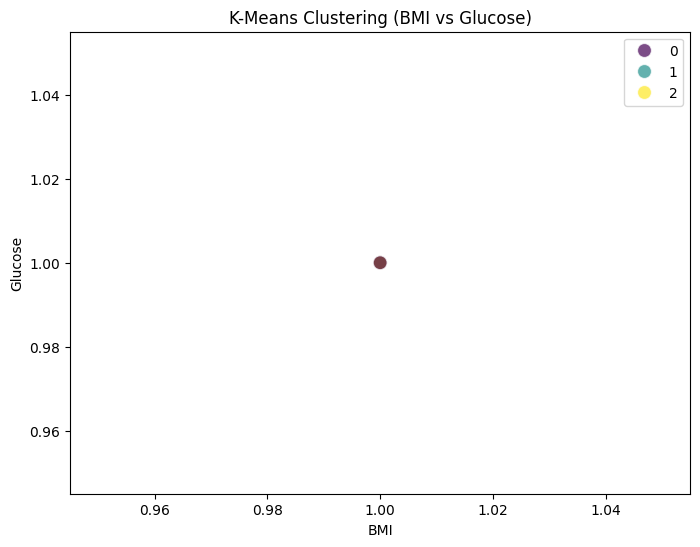

In [35]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters (n_clusters)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clustering result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['BMI'], y=df['glucose'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering (BMI vs Glucose)')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend()
plt.show()


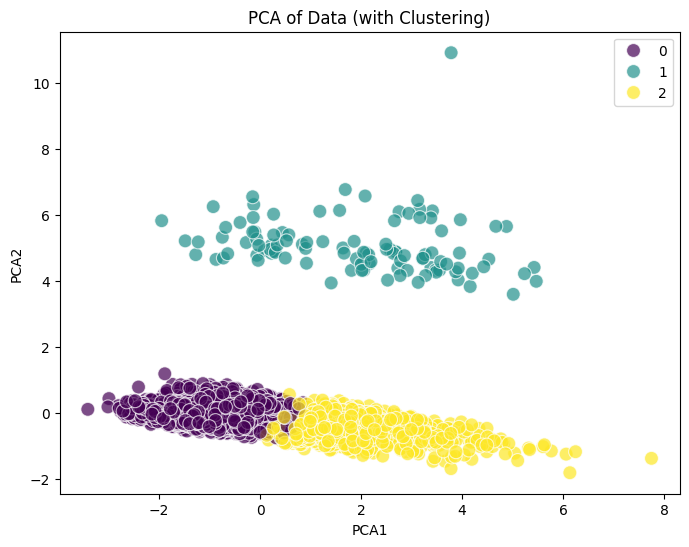

Variance explained by PCA1: 0.44
Variance explained by PCA2: 0.17


In [36]:
# Apply PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for the PCA components
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Plot the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('PCA of Data (with Clustering)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Variance explained by each component
print(f"Variance explained by PCA1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variance explained by PCA2: {pca.explained_variance_ratio_[1]:.2f}")


In [37]:
# Save the DataFrame with the cluster labels to a new CSV file
df.to_csv('Cardiovascular_with_Clusters.csv', index=False)


# Feature Selection

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [39]:
# Assuming 'TenYearCHD' is the target variable
X = df.drop(columns=['TenYearCHD', 'id'])  # Drop target and non-numeric columns
y = df['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Check which columns are categorical
categorical_columns = df.select_dtypes(include=['object']).columns

# Check for unique values in the categorical columns to decide encoding type
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in is_smoking: ['YES' 'NO']


In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns (e.g., sex, education, etc.)
# You can specify columns based on your inspection in the previous step
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Verify the changes
print(df.head())


   id  age  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   0   64           1           1       1                0             0   
1   1   36           0           1       1                0             1   
2   2   46           1           1       1                0             0   
3   3   50           1           1       1                0             1   
4   4   64           1           1       1                0             0   

   diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  \
0         0        1  148.0   85.0    1          1        1           1   
1         0        1  168.0   98.0    1          1        1           0   
2         0        1  116.0   71.0    1          1        1           0   
3         0        1  158.0   88.0    1          1        1           1   
4         0        1  136.5   85.0    1          1        1           0   

   Cluster  sex_1  
0        0  False  
1        2   True  
2        0  False  
3     

In [46]:
# Apply One-Hot Encoding to nominal columns (e.g., 'is_smoking', 'BPMeds')
df = pd.get_dummies(df, drop_first=True)

# Verify the changes
print(df.head())


   id  age  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   0   64           1           1       1                0             0   
1   1   36           0           1       1                0             1   
2   2   46           1           1       1                0             0   
3   3   50           1           1       1                0             1   
4   4   64           1           1       1                0             0   

   diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  TenYearCHD  \
0         0        1  148.0   85.0    1          1        1           1   
1         0        1  168.0   98.0    1          1        1           0   
2         0        1  116.0   71.0    1          1        1           0   
3         0        1  158.0   88.0    1          1        1           1   
4         0        1  136.5   85.0    1          1        1           0   

   Cluster  sex_1  
0        0  False  
1        2   True  
2        0  False  
3     

In [42]:
# Apply One-Hot Encoding to categorical columns (for nominal variables)
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Prepare the data
X = df.drop(columns=['TenYearCHD', 'id'])  # Drop target and non-numeric columns
y = df['TenYearCHD']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)

# Apply RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected features using RFE:")
print(selected_features_rfe)


Selected features using RFE:
Index(['age', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'BMI', 'heartRate', 'Cluster', 'sex_1'],
      dtype='object')


In [48]:
# Create a new dataset with selected features (e.g., using the features from RFE)
X_train_selected = X_train[selected_features_rfe]
X_test_selected = X_test[selected_features_rfe]

# Print the new dataset
print("New training data with selected features:")
print(X_train_selected.head())


New training data with selected features:
      age  is_smoking  prevalentStroke  prevalentHyp  diabetes  totChol  BMI  \
2378   66           0                0             1         0        1    1   
3182   53           0                0             1         0        1    1   
921    46           1                0             0         0        1    1   
2244   40           1                0             0         0        1    1   
3131   51           0                0             0         0        1    1   

      heartRate  Cluster  sex_1  
2378          1        2  False  
3182          1        2  False  
921           1        0  False  
2244          1        0  False  
3131          1        0  False  


In [49]:
# Save the new dataset with selected features
X_train_selected.to_csv('X_train_selected.csv', index=False)
X_test_selected.to_csv('X_test_selected.csv', index=False)


# Supervised

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [51]:
# Drop target column 'TenYearCHD' and 'id' columns, keep all other features
X = df.drop(columns=['TenYearCHD', 'id'])  # Features
y = df['TenYearCHD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often improves performance for some models like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [52]:
# 1. Logistic Regression (Linear Model)
lr = LogisticRegression(max_iter=10000, random_state=42)

# 2. K-Nearest Neighbors (Non-linear Model)
knn = KNeighborsClassifier()

# 3. Support Vector Machine (SVM) (Non-linear Model)
svm = SVC(random_state=42)

# 4. Random Forest Classifier (Ensemble Model)
rf = RandomForestClassifier(random_state=42)

# 5. Gradient Boosting Classifier (Boosting Algorithm)
gb = GradientBoostingClassifier(random_state=42)


In [53]:
# Train and evaluate each model

# Logistic Regression
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

# K-Nearest Neighbors
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {knn_acc:.4f}")

# Support Vector Machine
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Support Vector Machine Accuracy: {svm_acc:.4f}")

# Random Forest Classifier
rf.fit(X_train, y_train)  # No need to scale for Random Forest
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

# Gradient Boosting Classifier
gb.fit(X_train, y_train)  # No need to scale for Gradient Boosting
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")


Logistic Regression Accuracy: 0.8658
K-Nearest Neighbors Accuracy: 0.8540
Support Vector Machine Accuracy: 0.8569
Random Forest Accuracy: 0.8525
Gradient Boosting Accuracy: 0.8569


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Print detailed performance for Gradient Boosting (as an example)
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

print("\nConfusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, gb_pred))



Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       581
           1       0.50      0.06      0.11        97

    accuracy                           0.86       678
   macro avg       0.68      0.53      0.52       678
weighted avg       0.81      0.86      0.81       678


Confusion Matrix for Gradient Boosting:
[[575   6]
 [ 91   6]]


# Performance Measure

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# Prepare the data (assumed already cleaned and encoded)
X = df.drop(columns=['TenYearCHD', 'id'])  # Features
y = df['TenYearCHD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often improves performance for models like SVM and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [57]:
# Initialize the classifiers
lr = LogisticRegression(max_iter=10000, random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


In [58]:
models = {'Logistic Regression': lr, 'K-Nearest Neighbors': knn, 'SVM': svm, 'Random Forest': rf, 'Gradient Boosting': gb}

# Store the results for each classifier
results = {}

for name, model in models.items():
    # Train the model
    if name in ['Random Forest', 'Gradient Boosting']:  # No need to scale for these models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix
    }

    # Print the results
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\nClassification Report for {name}:\n{class_report}")
    print(f"Confusion Matrix for {name}:\n{conf_matrix}\n")


Logistic Regression Performance:
Accuracy: 0.8658
Precision: 0.8000
Recall: 0.0825
F1-Score: 0.1495

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       581
           1       0.80      0.08      0.15        97

    accuracy                           0.87       678
   macro avg       0.83      0.54      0.54       678
weighted avg       0.86      0.87      0.82       678

Confusion Matrix for Logistic Regression:
[[579   2]
 [ 89   8]]

K-Nearest Neighbors Performance:
Accuracy: 0.8540
Precision: 0.4706
Recall: 0.1649
F1-Score: 0.2443

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       581
           1       0.47      0.16      0.24        97

    accuracy                           0.85       678
   macro avg       0.67      0.57      0.58       678
weighted avg       0.82      0.85      

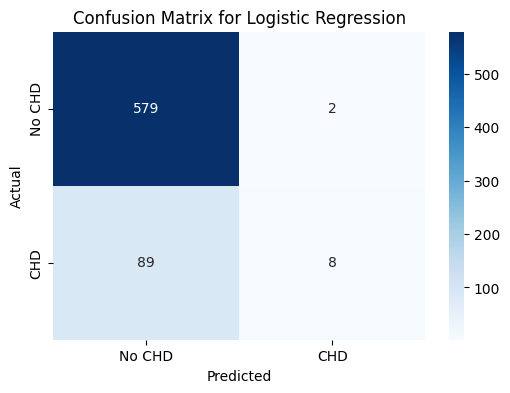

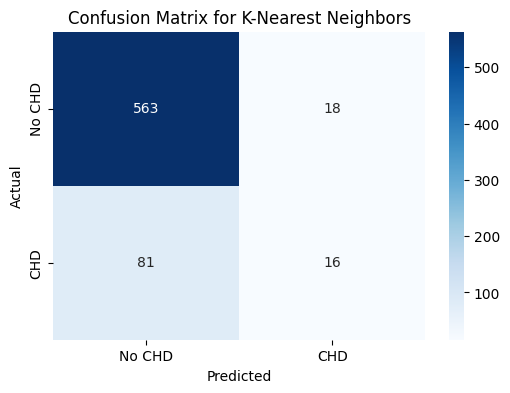

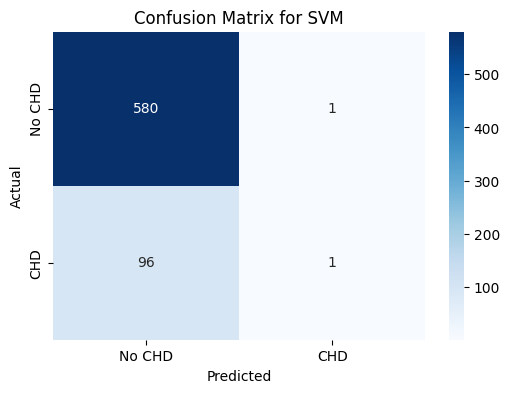

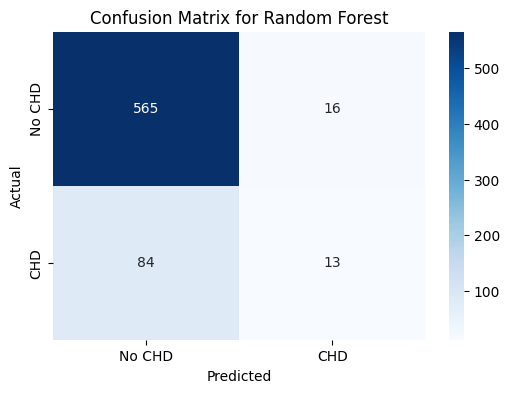

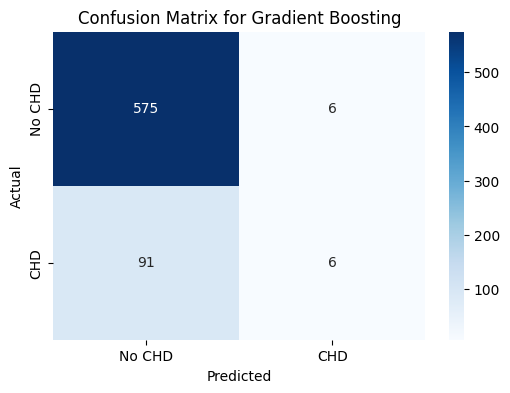

In [59]:
# Plotting confusion matrix using seaborn heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each classifier
for name, result in results.items():
    plot_confusion_matrix(result['Confusion Matrix'], f"Confusion Matrix for {name}")


In [60]:
import pandas as pd

# Create a DataFrame from the results
metrics_df = pd.DataFrame(results).T  # Transpose so that models are rows
metrics_df.to_csv('model_performance_metrics.csv', index=True)

print("Performance metrics saved to 'model_performance_metrics.csv'")


Performance metrics saved to 'model_performance_metrics.csv'


In [61]:
# Save confusion matrix plots as image files
for name, result in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Save the plot as an image
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.close()

print("Confusion matrix images saved.")


Confusion matrix images saved.


In [62]:
from google.colab import files

# Download the CSV file
files.download('model_performance_metrics.csv')

# Download the confusion matrix images
for name in results.keys():
    image_filename = f'confusion_matrix_{name.replace(" ", "_")}.png'
    files.download(image_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # input features
y = iris.target  # output labels

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

# Display the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [64]:
# Create new features: Combine Petal Length and Petal Width
df['petal_combined'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal_combined'] = df['sepal length (cm)'] * df['sepal width (cm)']

# Update X to include the new features
X_new = df.drop('species', axis=1)  # Remove the target column


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 100.00%
Support Vector Machine Accuracy: 100.00%
Random Forest Accuracy: 100.00%
K-Nearest Neighbors Accuracy: 100.00%


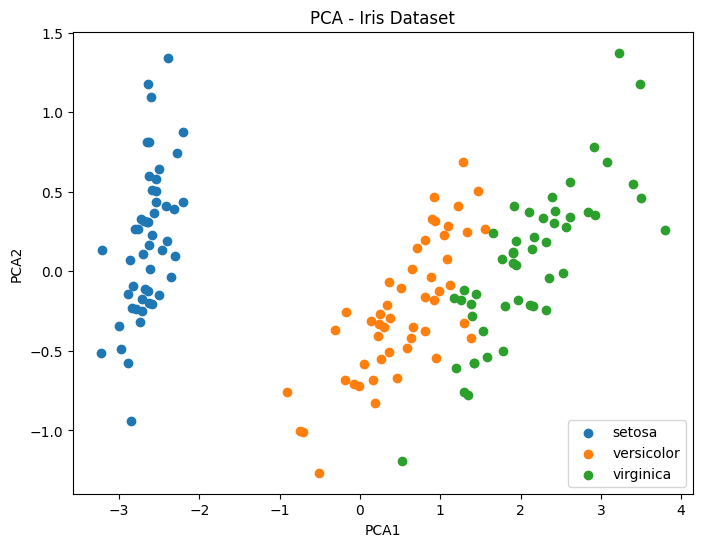

Explained Variance Ratio: [0.92461872 0.05306648]


In [66]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # input features
y = iris.target  # output labels

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# Convert the transformed data into a DataFrame for easier handling
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['species'] = iris.target_names[y]

# Visualize the PCA results
plt.figure(figsize=(8, 6))
for species in iris.target_names:
    subset = df_pca[df_pca['species'] == species]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=species)

plt.title('PCA - Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Print the explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


In [68]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a random forest classifier
model = RandomForestClassifier()

# Apply RFE to select top 2 features
rfe = RFE(estimator=model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X_train, y_train)

# Train the model using the selected features
model.fit(X_rfe, y_train)

# Evaluate the model on the test set
X_test_rfe = rfe.transform(X_test)
accuracy = model.score(X_test_rfe, y_test)
print(f"Model Accuracy with RFE-selected features: {accuracy * 100:.2f}%")

# Print the selected features
selected_features = [iris.feature_names[i] for i in range(len(iris.feature_names)) if rfe.support_[i]]
print(f"Selected Features: {selected_features}")


Model Accuracy with RFE-selected features: 100.00%
Selected Features: ['petal length (cm)', 'petal width (cm)']


In [69]:
df_pca.to_csv('PCA_Transformed_Iris.csv', index=False)
df.to_csv('RFE_Selected_Features_Iris.csv', index=False)
